# Predicting Molecular Properties using Machine Learning Models on the QM9 Dataset

## Research Question:
- Can we accurately predict quantum chemical properties of molecules using classical machine learning models like Random Forest and XGBoost, and improve perfomance through feature transfer from neural network-based embeddings?

## Project Objectives:
### Develop Predictive Models:
- Use Random Forest and XGBoost algorithms to predict molecular properties from the QM9 dataset.
### Target Key Properties:
Focus on predicting critical quantum molecular properties, including:
- HOMO-LUMO gap
- Dipole moment
- Atomization energy
### Leverage QM9 Dataset:
- Utilize the standardized and widely accepted QM9 dataset for training and evaluation.
### Incorporate Feature Transfer:
- Enhance tabular input with abstract representations inspired by neural networks such as SchNet or PhysNet.
### Bridge ML Paradigms:
- Integrate traditional machine learning with representation learning to improve model performance.
### Evaluate Model Performance:
- Benchmark models using appropriate metrics (e.g., MAE, RMSE) to assess prediction accuracy and generalization.


## Motivation and Significance:
### 1. Reduce Computational Costs:
- Density Functional Theory (DFT) calculations are resource-intensive—machine learning offers a faster alternative.
### 2. Accelerate Material Discovery:
- Predictive ML models can streamline the search for new molecules and materials.
### 3. Enable Scalable Simulations:
- Efficient algorithms allow large-scale quantum simulations previously limited by DFT.
### 4. Enhance Interpretability:
- Combining traditional ML with modern representations supports transparent, explainable models.
### 5. Cross-Disciplinary Impact:
- Potential applications in drug discovery, catalyst development, and electronic materials design.

## Dataset:
We will use the QM9 dataset available through TensorFlow Datasets.
- Dataset link: https://www.tensorflow.org/datasets/catalog/qm9
- The dataset includes over 130,000 small organic molecules with the following features:
- Atom types and 3D coordinates
- Quantum chemical properties (e.g., energy levels, dipole moments)
- Molecular descriptors and calculated DFT outputs
### Examples of Features:
- homo, lumo, gap – frontier orbital energies
- mu – dipole moment
- alpha – polarizability
- U0, H, G – internal energy, enthalpy, and Gibbs free energy
- SMILES and InChI – chemical string representations


In [1]:
import tensorflow_datasets as tfds
import pandas as pd

# Loading the Dataset 
ds, ds_info = tfds.load('qm9',with_info = True, split = "train")

In [2]:
# show the features in our dataset
print(ds_info)

tfds.core.DatasetInfo(
    name='qm9',
    full_name='qm9/original/1.0.0',
    description="""
    QM9 consists of computed geometric, energetic, electronic, and thermodynamic
    properties for 134k stable small organic molecules made up of C, H, O, N, and F.
    As usual, we remove the uncharacterized molecules and provide the remaining
    130,831.
    """,
    config_description="""
    QM9 does not define any splits. So this variant puts the full QM9 dataset in the train split, in the original order (no shuffling).
    """,
    homepage='https://doi.org/10.6084/m9.figshare.c.978904.v5',
    data_dir='C:\\Users\\tkasiror\\tensorflow_datasets\\qm9\\original\\1.0.0',
    file_format=tfrecord,
    download_size=82.62 MiB,
    dataset_size=177.16 MiB,
    features=FeaturesDict({
        'A': float32,
        'B': float32,
        'C': float32,
        'Cv': float32,
        'G': float32,
        'G_atomization': float32,
        'H': float32,
        'H_atomization': float32,
        '

In [3]:
# Convert the entire dataset to a list of dicts
data_list = [dict(example) for example in tfds.as_numpy(ds)]

# Convert list of dicts to DataFrame
df = pd.DataFrame(data_list)

df.head()

,A,B,C,Cv,G,G_atomization,H,H_atomization,InChI,InChI_relaxed,...,gap,homo,index,lumo,mu,num_atoms,positions,r2,tag,zpve
0,157.711807,157.709976,157.706985,6.469,-40.498596,-0.593572,-40.475117,-0.639058,b'InChI=1S/CH4/h1H4',b'InChI=1S/CH4/h1H4',...,0.5048,-0.3877,1,0.1171,0.0000,5,"[[-0.012698136, 1.0858041, 0.008000996], [0.00...",35.364101,b'gdb',0.044749
1,293.609741,293.541107,191.393967,6.316,-56.544960,-0.413283,-56.522083,-0.446845,b'InChI=1S/H3N/h1H3',b'InChI=1S/H3N/h1H3',...,0.3399,-0.2570,2,0.0829,1.6256,4,"[[-0.040426053, 1.0241077, 0.0625638], [0.0172...",26.156300,b'gdb',0.034358
2,799.588135,437.903870,282.945465,6.002,-76.422348,-0.320963,-76.400925,-0.342879,b'InChI=1S/H2O/h1H2',b'InChI=1S/H2O/h1H2',...,0.3615,-0.2928,3,0.0687,1.8511,3,"[[-0.034360494, 0.9775396, 0.007601592], [0.06...",19.000200,b'gdb',0.021375
3,0.000000,35.610035,35.610035,8.574,-77.327431,-0.582941,-77.304581,-0.619937,b'InChI=1S/C2H2/c1-2/h1-2H',b'InChI=1S/C2H2/c1-2/h1-2H',...,0.3351,-0.2845,4,0.0506,0.0000,4,"[[0.5995395, 0.0, 1.0], [-0.5995395, 0.0, 1.0]...",59.524799,b'gdb',0.026841
4,0.000000,44.593884,44.593884,6.278,-93.431244,-0.460105,-93.408424,-0.484601,b'InChI=1S/CHN/c1-2/h1H',b'InChI=1S/CHN/c1-2/h1H',...,0.3796,-0.3604,5,0.0191,2.8937,3,"[[-0.013323931, 1.1324657, 0.008275886], [0.00...",48.747601,b'gdb',0.016601


In [4]:
# a description of the dataset
df.describe()

,A,B,C,Cv,G,G_atomization,H,H_atomization,U,U0,...,U_atomization,alpha,gap,homo,index,lumo,mu,num_atoms,r2,zpve
count,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,...,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000
mean,9.966023,1.406728,1.127399,31.620365,-410.852875,-2.603199,-410.809998,-2.830368,-410.810944,-410.819458,...,-2.814281,75.281189,0.252045,-0.240210,66839.584976,0.011835,2.672953,18.032500,1189.410645,0.149090
std,1830.463013,1.600828,1.107471,4.067581,39.894783,0.349058,39.894066,0.385474,39.894066,39.894283,...,0.382751,8.173831,0.047192,0.021967,38457.235392,0.046850,1.503479,2.943715,280.478149,0.033138
min,0.000000,0.337120,0.331180,6.002000,-714.602112,-3.851932,-714.559204,-4.211903,-714.560181,-714.568054,...,-4.185451,6.310000,0.024600,-0.428600,1.000000,-0.175000,0.000000,3.000000,19.000200,0.015951
25%,2.555040,1.091545,0.911495,28.955000,-437.911835,-2.827818,-437.869919,-3.078822,-437.870865,-437.878799,...,-3.061095,70.480003,0.217000,-0.252600,33749.500000,-0.023300,1.577800,16.000000,1017.431244,0.125638
50%,3.090100,1.370650,1.082030,31.577999,-416.841309,-2.608441,-416.799591,-2.835484,-416.800537,-416.808472,...,-2.819446,75.599998,0.250200,-0.241100,67093.000000,0.012600,2.475300,18.000000,1147.221069,0.148629
75%,3.836890,1.655050,1.282720,34.298000,-387.074524,-2.379072,-387.030273,-2.581601,-387.031219,-387.040466,...,-2.567252,80.610001,0.289400,-0.228900,100063.500000,0.050900,3.596350,20.000000,1309.046997,0.171397
max,619867.687500,437.903870,282.945465,46.969002,-40.498596,-0.320963,-40.475117,-0.342879,-40.476063,-40.478931,...,-0.340990,196.619995,0.622100,-0.101700,133885.000000,0.193500,29.556400,29.000000,3374.753174,0.273944


## Key Columns and Their Meanings (QM9 Dataset)

| **Symbol**    | **Meaning** |
|---------------|-------------|
| `A`        | **Rotational constant A** (GHz) — corresponds to rotation around the **principal axis with the smallest moment of inertia** |
| `B`        | **Rotational constant B** (GHz) — corresponds to rotation around the **intermediate moment of inertia axis** |
| `C`        | **Rotational constant C** (GHz) — corresponds to rotation around the **axis with the largest moment of inertia** |
| `mu`          | **Dipole moment** (Debye) — quantifies charge separation in the molecule |
| `alpha`       | **Isotropic polarizability** (Bohr³) — how easily a molecule's electron cloud distorts in an electric field |
| `homo`        | **Highest Occupied Molecular Orbital energy** (eV) — energy of the most energetic electron in a filled orbital |
| `lumo`        | **Lowest Unoccupied Molecular Orbital energy** (eV) — energy of the lowest empty orbital |
| `gap`         | **HOMO-LUMO energy gap** (eV) — energy difference between `homo` and `lumo`, important for optical/electronic properties |
| `r2`          | **Electronic spatial extent** (Bohr²) — represents the size of the electron cloud |
| `zpve`        | **Zero Point Vibrational Energy** (eV) — energy remaining when vibrational motion is at its lowest quantum state |
| `U0`          | **Internal energy at 0 K** (eV) — includes electronic and vibrational components |
| `U`           | **Internal energy at 298.15 K** (eV) |
| `H`           | **Enthalpy at 298.15 K** (eV) — total energy including pressure-volume work |
| `G`           | **Gibbs free energy at 298.15 K** (eV) — useful for predicting spontaneity of reactions |
| `Cv`          | **Heat capacity at constant volume** (cal/mol·K) — how much heat is needed to raise temperature |
| `SMILES`      | **Simplified Molecular Input Line Entry System** — a compact ASCII string that encodes a molecular structure |
| `InChI`       | **IUPAC International Chemical Identifier** — a textual identifier providing a standard way to encode molecular information |
| `omega1` to `omega3N-6` | **Vibrational frequencies** (cm⁻¹) — frequencies of normal modes of vibration for each molecule |


In [5]:
# check for missing values
df.isna().any().any()

False

### There are no missing values in the dataframe

In [6]:
# check if all the values in given column are of the same dtype
def same_dtype(data_frame):
    for column in data_frame.columns:
        if len(data_frame[column].map(type).unique()) > 1:
            return False
    return True

In [7]:
same_dtype(df)

True

###  All columns contain consistent data types 

In [8]:
# check for duplicates 
# df.duplicated().sum() this code failed due to unhashable values in curtain columns 


def find_hashable_columns(df):
    '''
    returns a list of the hashable columns of a dataframe
    '''
    hashable_cols = []
    for col in df.columns:
        try:
            df[col].apply(hash)
            hashable_cols.append(col)
        except TypeError:
            continue
    return hashable_cols

find_hashable_columns(df)


['A',
 'B',
 'C',
 'Cv',
 'G',
 'G_atomization',
 'H',
 'H_atomization',
 'InChI',
 'InChI_relaxed',
 'SMILES',
 'SMILES_relaxed',
 'U',
 'U0',
 'U0_atomization',
 'U_atomization',
 'alpha',
 'gap',
 'homo',
 'index',
 'lumo',
 'mu',
 'num_atoms',
 'r2',
 'tag',
 'zpve']

In [9]:
df_hashable = df[find_hashable_columns(df)]

In [10]:
df_hashable.duplicated().sum()

0

### No duplicate rows found

In [11]:
del df_hashable 

In [12]:
# Selecting a portion of the DataFrame for visualisations
df_vies = df.iloc[0:200][['SMILES', 'homo', 'lumo', 'mu', 'num_atoms','gap']] 
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap
0,b'C',-0.3877,0.1171,0.0000,5,0.5048
1,b'N',-0.2570,0.0829,1.6256,4,0.3399
2,b'O',-0.2928,0.0687,1.8511,3,0.3615
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796


In [13]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors

In [14]:
#Add a new column with the SMILES data written as str not byte
df_vies['SMILES_str'] = df['SMILES'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N


In [15]:
# Compute molecular weight using RDKit
def compute_mol_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.MolWt(mol)
    else:
        return float('nan') # in case RDKit fails to parse

df_vies['molecular_weight'] = df_vies['SMILES_str'].apply(compute_mol_weight)
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str,molecular_weight
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C,16.043
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N,17.031
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O,18.015
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C,26.038
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N,27.026


In [16]:
df_vies.molecular_weight.isna().any() #check for missing values

False

In [17]:
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str,molecular_weight
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C,16.043
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N,17.031
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O,18.015
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C,26.038
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N,27.026


In [18]:
# Sort by molecular weight
df_vies_sorted = df_vies.sort_values(by='molecular_weight', ascending=True).reset_index(drop=True)
df_vies_sorted.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str,molecular_weight
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C,16.043
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N,17.031
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O,18.015
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C,26.038
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N,27.026


In [19]:
(df_vies_sorted == df_vies)

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str,molecular_weight
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False


### Data was already sorted in increasing molecular weight

In [20]:
del df_vies_sorted

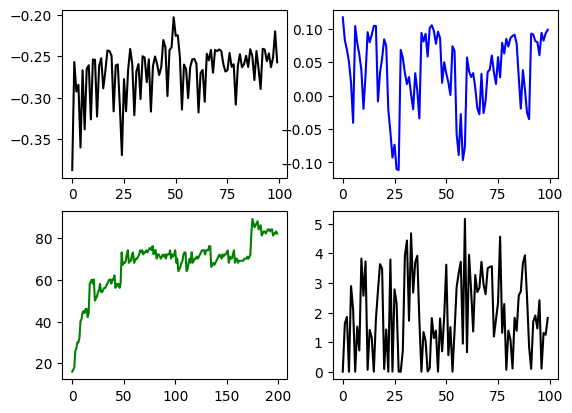

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
axes[0,0].plot(df_vies.homo[:100], color="black");
axes[0,1].plot(df_vies.lumo[:100], color="blue",  linestyle="-");
axes[1,0].plot(df_vies.molecular_weight, color="green");
axes[1,1].plot(df_vies.mu[:100], color="black");

#### Plot (0, 0) – HOMO Energy vs Index

**Observation:**  
- Values are negative (as expected), fairly stable with small fluctuations.

**Insight:**  
- HOMO energy levels are tightly grouped, likely indicating a structurally similar set of molecules in terms of electron-rich orbitals.

#### Plot (0, 1) – LUMO Energy vs Index

**Observation:**  
- More variation than HOMO, possibly a wider range of electron affinity.

**Insight:**  
- Variability in LUMO may indicate greater differences in acceptor properties among the molecules.

#### Plot (1, 0) – Molecular Weight vs Index

**Observation:**  
- Steadily increasing trend, as expected if the data is sorted by molecular weight.

**Insight:**  
- Indicates proper ordering; useful for comparing with other properties.

#### Plot (1, 1) – Dipole Moment (μ) vs Index

**Observation:**  
- Wide fluctuations; no clear pattern.

**Insight:**  
- Dipole moment varies independently, not obviously tied to HOMO or LUMO for these molecules.


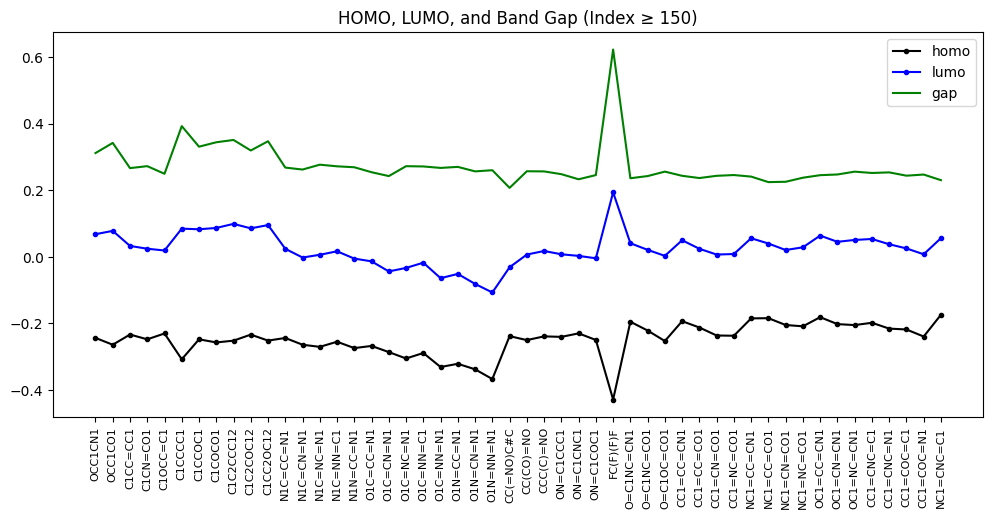

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_vies.homo[150:], color="black", 
        marker = ".", label ="homo");
ax.plot(df_vies.lumo[150:], color="blue",
        marker=".", label="lumo");
ax.plot(df_vies.gap[150:], color="green", label="gap");

ticks = ax.set_xticks(df_vies.index[150:])
labels = ax.set_xticklabels(df_vies.SMILES_str[150:], rotation=90, fontsize=8)
ax.set_title("HOMO, LUMO, and Band Gap (Index ≥ 150)")
ax.legend();

In [23]:
df_vies[['homo', 'lumo', 'gap']].corr()


,homo,lumo,gap
homo,1.000000,0.096983,-0.505721
lumo,0.096983,1.000000,0.809584
gap,-0.505721,0.809584,1.000000


### Insights
- homo and lumo: 0.096983 (weak positive correlation)
- homo and gap: -0.505721 (moderate negative correlation)
- lumo and gap: 0.809584 (strong positive correlation)

In [24]:
import seaborn as sns

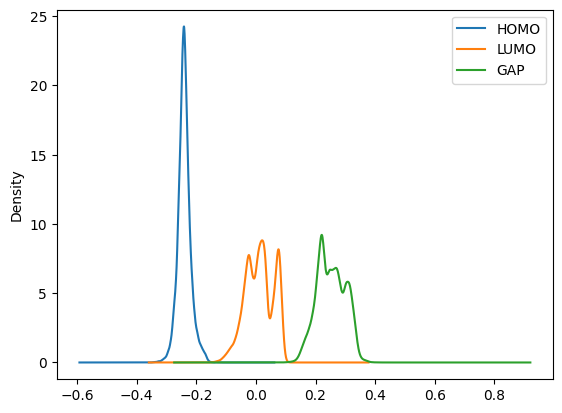

In [25]:
df['homo'].plot.kde();
df['lumo'].plot.kde();
df['gap'].plot.kde();
plt.legend(['HOMO', 'LUMO', 'GAP']);



### Key Insights from HOMO–LUMO Density Plot

1. **HOMO Distribution**
   - Sharp, narrow peak around **–0.22 eV**.
   - Indicates **low variability** in HOMO energy across molecules.
   - Suggests **consistent electronic stability**.

2. **LUMO Distribution**
   - **Broader and multimodal** with peaks near **0 eV**.
   - Indicates **greater diversity** in unoccupied energy levels.
   - Likely reflects presence of **chemically distinct subgroups**.

3. **HOMO–LUMO Gap (Implied)**
   - Average gap appears to be **~0.2–0.4 eV**.
   - Suggests molecules are **electronically soft** (potentially reactive).
   - Useful for **conductive or optoelectronic material screening**.

4. **Chemical Implication**
   - Multimodal LUMO hints at **underlying structural or compositional differences** worth clustering or classifying.


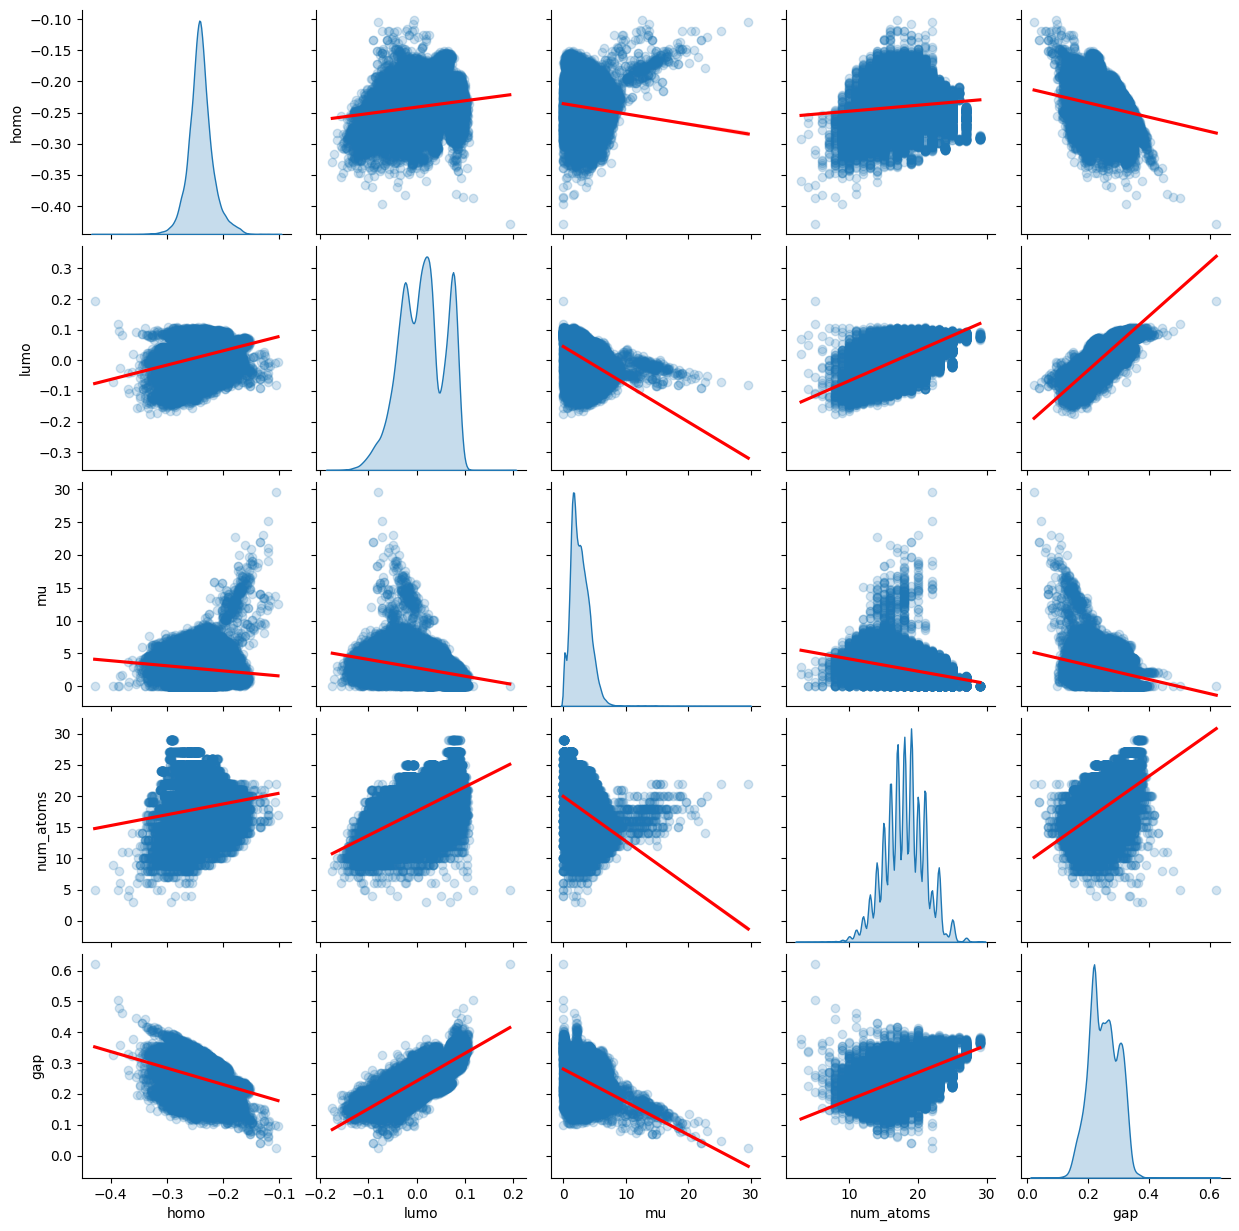

In [26]:
plot = sns.pairplot(
    df[['homo', 'lumo', 'mu', 'num_atoms','gap']], 
    diag_kind="kde",
    kind="reg",
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}});

plot.savefig("pairplot_output.png", dpi=300, bbox_inches='tight')


In [27]:
del df_vies

In [28]:
# Dropping all DFT-derived columns and geometry-dependent fields (e.g., Mulliken charges, frequencies, positions, relaxed SMILES/InChI)
# to prevent data leakage and ensure the model learns only from structure-based inputs (SMILES, InChI).
# Our goal is to predict quantum properties (HOMO, LUMO, dipole moment) using low-cost, reproducible descriptors.

columns_to_keep = [
    'SMILES',          # input
    'InChI',           # optional identifier
    'homo',            # target
    'lumo',            # target
    'mu',              # target
    'num_atoms',       # basic input
    'tag'              # optional metadata
]

df_cleaned = df[columns_to_keep]


In [29]:
df_cleaned.describe()

,homo,lumo,mu,num_atoms
count,130831.000000,130831.000000,130831.000000,130831.000000
mean,-0.240210,0.011835,2.672953,18.032500
std,0.021967,0.046850,1.503479,2.943715
min,-0.428600,-0.175000,0.000000,3.000000
25%,-0.252600,-0.023300,1.577800,16.000000
50%,-0.241100,0.012600,2.475300,18.000000
75%,-0.228900,0.050900,3.596350,20.000000
max,-0.101700,0.193500,29.556400,29.000000


In [30]:
df_metadata = df_cleaned[['tag']]  # Save for later if needed
df_cleaned = df_cleaned.drop(columns=['tag'])  # Do not use for training

In [31]:
from rdkit.Chem import Crippen, rdMolDescriptors

# Function to compute selected RDKit descriptors
def rdkit_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return [np.nan] * 5
        mol_mr = Crippen.MolMR(mol)
        tpsa = rdMolDescriptors.CalcTPSA(mol)
        logp = Crippen.MolLogP(mol)
        fsp3 = rdMolDescriptors.CalcFractionCSP3(mol)
        num_aromatic_rings = rdMolDescriptors.CalcNumAromaticRings(mol)
        return [mol_mr, tpsa, logp, fsp3, num_aromatic_rings]
    except Exception as e:
        print(f"Error processing SMILES: {smiles}\n{e}")
        return [np.nan] * 5

# Descriptor column names
descriptor_columns = ['MolMR', 'TPSA', 'LogP', 'FractionCSP3', 'NumAromaticRings']

# Apply the function and store descriptors in a DataFrame
descriptor_values = df_cleaned['SMILES'].apply(rdkit_descriptors)
descriptor_df = pd.DataFrame(descriptor_values.tolist(), columns=descriptor_columns)

# Concatenate new descriptors to df_cleaned
df_cleaned = pd.concat([df_cleaned.reset_index(drop=True), descriptor_df], axis=1)

# (Optional) Drop rows with any NaNs in new descriptors
df_cleaned = df_cleaned.dropna(subset=descriptor_columns)

# Preview the updated DataFrame
print(df_cleaned[descriptor_columns].head())




    MolMR   TPSA     LogP  FractionCSP3  NumAromaticRings
0  6.7310   0.00  0.63610           1.0                 0
1  5.0221  35.00  0.16200           0.0                 0
2  3.6138  31.50 -0.82470           0.0                 0
3  9.8900   0.00  0.24940           0.0                 0
4  6.6700  23.79  0.13978           0.0                 0


In [32]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors, Descriptors
from joblib import Parallel, delayed
from tqdm import tqdm
import time
from multiprocessing import cpu_count, Manager

NUM_CORES = cpu_count()
OUTPUT_FILE = "qm9_rdkit_3d_plus_2d_descriptors.csv"

# === Worker Function ===
def safe_compute_descriptors(smiles, index=None, progress_queue=None):
    try:
        smiles = smiles.decode() if isinstance(smiles, bytes) else smiles
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            if progress_queue: progress_queue.put(1)
            # Return NaN for all descriptors + index + smiles
            return [np.nan] * 12 + [index, smiles]

        # Compute 2D descriptors (BalabanJ, BertzCT)
        balaban_j = Descriptors.BalabanJ(mol)
        bertz_ct = Descriptors.BertzCT(mol)

        # Generate 3D conformer
        mol_h = Chem.AddHs(mol)
        status = AllChem.EmbedMolecule(mol_h, AllChem.ETKDGv3())
        if status != 0:
            status = AllChem.EmbedMolecule(mol_h, AllChem.ETDG())
            if status != 0:
                if progress_queue: progress_queue.put(1)
                return [balaban_j, bertz_ct] + [np.nan]*10 + [index, smiles]

        # Optimize with UFF (try MMFF first if you prefer)
        try:
            AllChem.MMFFOptimizeMolecule(mol_h)
        except:
            try:
                AllChem.UFFOptimizeMolecule(mol_h)
            except:
                pass

        # Calculate 3D descriptors
        radius_of_gyration = rdMolDescriptors.CalcRadiusOfGyration(mol_h)
        inertial_shape = rdMolDescriptors.CalcInertialShapeFactor(mol_h)
        asphericity = rdMolDescriptors.CalcAsphericity(mol_h)
        eccentricity = rdMolDescriptors.CalcEccentricity(mol_h)
        pmi1 = rdMolDescriptors.CalcPMI1(mol_h)
        pmi2 = rdMolDescriptors.CalcPMI2(mol_h)

        # Additional 3D descriptors you asked for:
        pmi3 = rdMolDescriptors.CalcPMI3(mol_h)
        spherocity = rdMolDescriptors.CalcSpherocityIndex(mol_h)
        npr1 = rdMolDescriptors.CalcNPR1(mol_h)
        npr2 = rdMolDescriptors.CalcNPR2(mol_h)

        if progress_queue: progress_queue.put(1)
        return [
            balaban_j, bertz_ct,
            radius_of_gyration, inertial_shape, asphericity,
            eccentricity, pmi1, pmi2, pmi3, spherocity, npr1, npr2,
            index, smiles
        ]

    except Exception as e:
        print(f"[ERROR] SMILES: {smiles} | {e}")
        if progress_queue: progress_queue.put(1)
        return [np.nan] * 12 + [index, smiles]

# === Column Names ===
columns = [
    "BalabanJ", "BertzCT",
    'RadiusOfGyration', 'InertialShapeFactor', 'Asphericity',
    'Eccentricity', 'PMI1', 'PMI2', 'PMI3', 'SpherocityIndex', 'NPR1', 'NPR2',
    'Index', 'SMILES'
]

# === Load your SMILES list ===
smiles_list = df_cleaned['SMILES'].tolist()

# === Parallel execution with progress tracking ===
def parallel_compute_with_progress(smiles_list):
    manager = Manager()
    progress_queue = manager.Queue()

    with tqdm(total=len(smiles_list), desc="Computing 2D+3D Descriptors", ncols=100) as pbar:
        from threading import Thread

        def update_progress_bar():
            while True:
                msg = progress_queue.get()
                if msg == "DONE":
                    break
                pbar.update(msg)

        t = Thread(target=update_progress_bar)
        t.start()

        results = Parallel(n_jobs=NUM_CORES, backend='loky')(
            delayed(safe_compute_descriptors)(smi, idx, progress_queue)
            for idx, smi in enumerate(smiles_list)
        )

        progress_queue.put("DONE")
        t.join()
        return results

# === Run the job ===
start_time = time.time()
results = parallel_compute_with_progress(smiles_list)

# === Convert to DataFrame and save ===
desc_df = pd.DataFrame(results, columns=columns)
desc_df = desc_df.dropna(subset=columns[2:-2])  # drop rows missing 3D descriptors (optional)
desc_df.to_csv(OUTPUT_FILE, index=False)

elapsed = time.time() - start_time
print(f"\n✅ Done in {elapsed/60:.2f} minutes. Saved to: {OUTPUT_FILE}")
print(desc_df.head())


Computing 2D+3D Descriptors: 100%|█████████████████████████| 130831/130831 [13:27<00:00, 161.95it/s]



✅ Done in 13.50 minutes. Saved to: qm9_rdkit_3d_plus_2d_descriptors.csv
   BalabanJ   BertzCT  RadiusOfGyration  InertialShapeFactor   Asphericity  \
0       0.0  0.000000          0.547544             0.311865  2.486999e-13   
1       0.0  0.000000          0.423642             0.374495  9.635543e-02   
2       0.0  0.000000          0.317202             1.016889  3.159671e-01   
3       3.0  4.754888          0.739717             0.000000  1.000000e+00   
4       3.0  6.754888          0.651489             0.000000  1.000000e+00   

   Eccentricity          PMI1       PMI2       PMI3  SpherocityIndex  \
0      0.000000  3.206513e+00   3.206514   3.206515     9.999991e-01   
1      0.764454  1.721463e+00   1.721464   2.670267     1.263772e-01   
2      0.936108  6.375201e-01   1.175094   1.812614     0.000000e+00   
3      1.000000  6.270681e-12  14.247500  14.247500     5.101081e-16   
4      1.000000  4.536243e-16  11.470860  11.470860     0.000000e+00   

           NPR1      NPR2

In [ ]:
df_cleaned['SMILES'] = df_cleaned['SMILES'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [34]:
import re
def clean_byte(s):
    if isinstance(s, str) and re.fullmatch(r"b'.*'", s):
        return s[2:-1]  # Strip b'' from start and end
    return s

df_cleaned['SMILES'] = df_cleaned['SMILES'].apply(clean_byte)
df_cleaned['InChI'] = df_cleaned['InChI'].apply(clean_byte)

In [35]:
df_cleaned['SMILES'].head()

0      b'C'
1      b'N'
2      b'O'
3    b'C#C'
4    b'C#N'
Name: SMILES, dtype: object

In [36]:
df_cleaned.to_csv("df_cleaned.csv")

In [41]:
desc3d_df = pd.read_csv("qm9_rdkit_3d_plus_2d_descriptors.csv")
df_cleaned['SMILES'] = df_cleaned['SMILES'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df_cleaned['InChI'] = df_cleaned['InChI'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [42]:
# Make sure 'SMILES' column is the same format in both
df_cleaned['SMILES'] = df_cleaned['SMILES'].astype(str)
desc3d_df['SMILES'] = desc3d_df['SMILES'].astype(str)

# Drop the 'Index' column from 3D descriptors (not needed anymore)
desc3d_df = desc3d_df.drop(columns=['Index'], errors='ignore')

# Merge on 'SMILES'
df_final = pd.merge(df_cleaned, desc3d_df, on='SMILES', how='inner')

# Preview
print("✅ Merged DataFrame shape:", df_final.shape)
print(df_final.head())


✅ Merged DataFrame shape: (120129, 23)
  SMILES                     InChI    homo    lumo      mu  num_atoms   MolMR  \
0      C         InChI=1S/CH4/h1H4 -0.3877  0.1171  0.0000          5  6.7310   
1      N         InChI=1S/H3N/h1H3 -0.2570  0.0829  1.6256          4  5.0221   
2      O         InChI=1S/H2O/h1H2 -0.2928  0.0687  1.8511          3  3.6138   
3    C#C  InChI=1S/C2H2/c1-2/h1-2H -0.2845  0.0506  0.0000          4  9.8900   
4    C#N     InChI=1S/CHN/c1-2/h1H -0.3604  0.0191  2.8937          3  6.6700   

    TPSA     LogP  FractionCSP3  ...  RadiusOfGyration  InertialShapeFactor  \
0   0.00  0.63610           1.0  ...          0.547544             0.311865   
1  35.00  0.16200           0.0  ...          0.423642             0.374495   
2  31.50 -0.82470           0.0  ...          0.317202             1.016889   
3   0.00  0.24940           0.0  ...          0.739717             0.000000   
4  23.79  0.13978           0.0  ...          0.651489             0.000000   


In [43]:
# Drop unwanted columns
df_final = df_final.drop(columns=['Unnamed: 0'], errors='ignore')

# Save cleaned dataset
df_final.to_csv("qm9_merged_clean.csv", index=False)


In [44]:
df = pd.read_csv("qm9_merged_clean.csv")


In [45]:
## adding more descriptors to the data
# Function to compute descriptors
def compute_tier1_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return [None] * 8  # return None for all features if parsing fails
        return [
            Descriptors.MolWt(mol),                 # Molecular Weight
            Descriptors.ExactMolWt(mol),            # Exact Molecular Weight
            Descriptors.HeavyAtomCount(mol),        # Heavy Atom Count
            Descriptors.NumValenceElectrons(mol),   # Total valence electrons
            Descriptors.NumHDonors(mol),            # H-bond donors
            Descriptors.NumHAcceptors(mol),         # H-bond acceptors
            Descriptors.NumRotatableBonds(mol),     # Rotatable bonds
            Descriptors.RingCount(mol)              # Total rings
        ]
    except:
        return [None] * 8

# Apply the function
descriptor_names = [
    "MolWt", "ExactMolWt", "HeavyAtomCount", "NumValenceElectrons",
    "NumHDonors", "NumHAcceptors", "NumRotatableBonds", "RingCount"
]

descriptor_values = df['SMILES'].apply(compute_tier1_descriptors)
descriptor_df = pd.DataFrame(descriptor_values.tolist(), columns=descriptor_names)

# Concatenate to original DataFrame
df_extended = pd.concat([df, descriptor_df], axis=1)

# Save result
df_extended.to_csv("qm9_extended.csv", index=False)

# Confirm
print("New DataFrame shape:", df_extended.shape)
print("Sample descriptors added:\n", df_extended[descriptor_names].head())


New DataFrame shape: (120129, 31)
Sample descriptors added:
     MolWt  ExactMolWt  HeavyAtomCount  NumValenceElectrons  NumHDonors  \
0  16.043   16.031300               1                    8           0   
1  17.031   17.026549               1                    8           1   
2  18.015   18.010565               1                    8           0   
3  26.038   26.015650               2                   10           0   
4  27.026   27.010899               2                   10           0   

   NumHAcceptors  NumRotatableBonds  RingCount  
0              0                  0          0  
1              1                  0          0  
2              0                  0          0  
3              0                  0          0  
4              1                  0          0  


In [1]:
import pandas as pd
df = pd.read_csv('qm9_extended.csv')

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def train_keras_regression(df, epochs=40, batch_size=256):
    """
    Train a Keras-based multi-target regression model with progress output.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset with features and targets ['homo', 'lumo', 'mu'].
    epochs : int
        Number of training epochs.
    batch_size : int
        Mini-batch size for training.

    Returns
    -------
    model : tf.keras.Model
        Trained Keras model.
    history : History object
        Training history with loss metrics.
    """

    # Define columns
    target_columns = ['homo', 'lumo', 'mu']
    excluded = ['SMILES', 'InChI'] + target_columns
    feature_cols = [col for col in df.columns if col not in excluded]

    # Split features and targets
    X = df[feature_cols].values
    y = df[target_columns].values

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.18, random_state=42
    )

    # Normalize inputs
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(3)  # 3 targets: homo, lumo, mu
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train model with verbose output
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    return model, history


In [15]:
model, history = train_keras_regression(df)


Epoch 1/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7240 - mae: 0.4087 - val_loss: 0.4114 - val_mae: 0.2955
Epoch 2/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3909 - mae: 0.2882 - val_loss: 0.3780 - val_mae: 0.2861
Epoch 3/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3732 - mae: 0.2777 - val_loss: 0.3614 - val_mae: 0.2734
Epoch 4/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3527 - mae: 0.2678 - val_loss: 0.3495 - val_mae: 0.2667
Epoch 5/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3414 - mae: 0.2628 - val_loss: 0.3442 - val_mae: 0.2658
Epoch 6/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3277 - mae: 0.2556 - val_loss: 0.3287 - val_mae: 0.2541
Epoch 7/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3148 - mae: 0.2498 - val_loss: 0.3369 - val_mae: 0.2581
Epoch 8/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3105 - mae: 0.2479 - val_loss: 0.3277 - val_mae: 0.2532
Epoch 9/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_keras_regression(df, epochs=40, batch_size=256):
    """
    Train a Keras-based multi-target regression model with enhanced architecture
    for predicting 'homo', 'lumo', and 'mu' from molecular descriptors.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset with features and targets ['homo', 'lumo', 'mu'].
    epochs : int
        Number of training epochs.
    batch_size : int
        Mini-batch size for training.

    Returns
    -------
    model : tf.keras.Model
        Trained Keras model.
    history : tf.keras.callbacks.History
        Training history with loss and MAE.
    evaluation : dict
        Dictionary of MAE, MSE, and R² for each target.
    predictions : np.ndarray
        Predicted target values on the test set.
    """

    # Define columns
    target_columns = ['homo', 'lumo', 'mu']
    excluded = ['SMILES', 'InChI'] + target_columns
    feature_cols = [col for col in df.columns if col not in excluded]

    # Split features and targets
    X = df[feature_cols].values
    y = df[target_columns].values

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.18, random_state=42
    )

    # Normalize inputs
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define model with improved architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(512),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(256),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(64),
        tf.keras.layers.LeakyReLU(),

        tf.keras.layers.Dense(3)  # Output: homo, lumo, mu
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    evaluation = {}
    for i, name in enumerate(target_columns):
        mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
        mse = mean_squared_error(y_test[:, i], y_pred[:, i])
        r2 = r2_score(y_test[:, i], y_pred[:, i])

        evaluation[name] = {
            'MAE': mae,
            'MSE': mse,
            'R2': r2
        }

        print(f"\n{name.upper()} Metrics:")
        print(f"  MAE: {mae:.5f}")
        print(f"  MSE: {mse:.5f}")
        print(f"  R²:  {r2:.5f}")

    return model, history, evaluation, y_pred


In [17]:
model, history, evaluation, y_pred =  train_keras_regression(df)

Epoch 1/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7420 - mae: 0.4602 - val_loss: 0.4820 - val_mae: 0.3169
Epoch 2/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4926 - mae: 0.3302 - val_loss: 0.4164 - val_mae: 0.2945
Epoch 3/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4286 - mae: 0.3073 - val_loss: 0.3907 - val_mae: 0.2866
Epoch 4/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4095 - mae: 0.2972 - val_loss: 0.3803 - val_mae: 0.2783
Epoch 5/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3989 - mae: 0.2903 - val_loss: 0.3880 - val_mae: 0.2811
Epoch 6/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3857 - mae: 0.2858 - val_loss: 0.3670 - val_mae: 0.2723
Epoch 7/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3839 - mae: 0.2836 - val_loss: 0.3768 - val_mae: 0.2718
Epoch 8/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3753 - mae: 0.2788 - val_loss: 0.3526 - val_mae: 0.2643
Epoch 9/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - lo

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_keras_regression(
    df, 
    epochs=40, 
    batch_size=256, 
    patience=5,
    l2_reg=1e-5,
    verbose=1,
    seed=42,
    save_model_path=None
):
    """
    Train a Keras multi-output regression model with normalization and regularization.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataset with descriptors and target columns ['homo', 'lumo', 'mu'].
    epochs : int
        Maximum number of training epochs.
    batch_size : int
        Batch size for training.
    patience : int
        Patience for early stopping.
    l2_reg : float
        L2 regularization factor.
    verbose : int
        Verbosity level for training.
    seed : int
        Random seed for reproducibility.
    save_model_path : str or None
        If given, saves the model to this path after training.

    Returns
    -------
    model : tf.keras.Model
    history : tf.keras.callbacks.History
    evaluation : dict
    y_pred : np.ndarray
    y_test_raw : np.ndarray
    """

    tf.random.set_seed(seed)
    np.random.seed(seed)

    target_columns = ['homo', 'lumo', 'mu']
    excluded = ['SMILES', 'InChI'] + target_columns
    feature_cols = [col for col in df.columns if col not in excluded]

    # Prepare data
    X = df[feature_cols].values
    y = df[target_columns].values

    X_train, X_test, y_train_raw, y_test_raw = train_test_split(
        X, y, test_size=0.18, random_state=seed
    )

    X_scaler = StandardScaler()
    y_scaler = StandardScaler()

    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_train = y_scaler.fit_transform(y_train_raw)
    y_test = y_scaler.transform(y_test_raw)

    # Build model with L2 regularization
    l2 = tf.keras.regularizers.l2(l2_reg)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(512, kernel_regularizer=l2),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(256, kernel_regularizer=l2),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128, kernel_regularizer=l2),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(64, kernel_regularizer=l2),
        tf.keras.layers.LeakyReLU(),

        tf.keras.layers.Dense(3)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=patience,
            restore_best_weights=True,
            verbose=verbose
        )
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=verbose
    )

    # Predict and inverse transform
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)

    # Evaluate on original scale
    evaluation = {}
    for i, name in enumerate(target_columns):
        mae = mean_absolute_error(y_test_raw[:, i], y_pred[:, i])
        mse = mean_squared_error(y_test_raw[:, i], y_pred[:, i])
        r2 = r2_score(y_test_raw[:, i], y_pred[:, i])

        evaluation[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
        print(f"\n{name.upper()} Metrics:")
        print(f"  MAE: {mae:.5f}")
        print(f"  MSE: {mse:.5f}")
        print(f"  R²:  {r2:.5f}")

    if save_model_path:
        model.save(save_model_path)
        print(f"\nModel saved to {save_model_path}")

    return model, history, evaluation, y_pred, y_test_raw


In [4]:
model, history, evaluation, y_pred, y_text_raw =  train_keras_regression(df)

Epoch 1/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.5054 - mae: 0.5268 - val_loss: 0.3291 - val_mae: 0.4213
Epoch 2/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3683 - mae: 0.4470 - val_loss: 0.3032 - val_mae: 0.3995
Epoch 3/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3444 - mae: 0.4290 - val_loss: 0.3074 - val_mae: 0.3999
Epoch 4/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3371 - mae: 0.4248 - val_loss: 0.2830 - val_mae: 0.3812
Epoch 5/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3164 - mae: 0.4103 - val_loss: 0.2746 - val_mae: 0.3737
Epoch 6/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3072 - mae: 0.4037 - val_loss: 0.2709 - val_mae: 0.3700
Epoch 7/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3007 - mae: 0.3972 - val_loss: 0.2648 - val_mae: 0.3644
Epoch 8/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2947 - mae: 0.3931 - val_loss: 0.2611 - val_mae: 0.3608
Epoch 9/40
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - lo

In [26]:
df.columns

Index(['SMILES', 'InChI', 'homo', 'lumo', 'mu', 'num_atoms', 'MolMR', 'TPSA',
       'LogP', 'FractionCSP3', 'NumAromaticRings', 'BalabanJ', 'BertzCT',
       'RadiusOfGyration', 'InertialShapeFactor', 'Asphericity',
       'Eccentricity', 'PMI1', 'PMI2', 'PMI3', 'SpherocityIndex', 'NPR1',
       'NPR2', 'MolWt', 'ExactMolWt', 'HeavyAtomCount', 'NumValenceElectrons',
       'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'RingCount'],
      dtype='object')

In [ ]:
# adding more features to my dataset 

In [ ]:
from mordred import Calculator, descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from tqdm import tqdm
import multiprocessing

def get_descriptor_name(desc):
    return str(desc).split('(')[0]

def prepare_mol(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        return None
    mol = Chem.AddHs(mol)
    status = AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    if status != 0:
        return None
    AllChem.MMFFOptimizeMolecule(mol)
    return mol

def compute_additional_3d_descriptors_parallel(smiles_list, existing_cols):
    calc = Calculator(descriptors, ignore_3D=False)
    existing_cols_set = set(existing_cols)

    # Filter out descriptors that are already in the dataset
    new_desc_names = [
        get_descriptor_name(desc)
        for desc in calc.descriptors
        if get_descriptor_name(desc) not in existing_cols_set
    ]

    valid_mols = []
    valid_indices = []

    for idx, smi in enumerate(tqdm(smiles_list, desc="Preparing molecules")):
        mol = prepare_mol(smi)
        if mol is not None:
            valid_mols.append(mol)
            valid_indices.append(idx)

    if len(valid_mols) == 0:
        raise ValueError("No valid molecules found for descriptor computation.")

    n_cores = max(1, multiprocessing.cpu_count() - 1)
    desc_df = pd.DataFrame(calc.map(valid_mols, nproc=n_cores))

    # Fix filtering: match base descriptor names
    available_cols = [
        col for col in desc_df.columns
        if col.split('.')[0] in new_desc_names
    ]
    desc_df = desc_df[available_cols]

    desc_df.index = valid_indices
    return desc_df.reset_index(drop=True)

# Example usage
existing_columns = df.columns.to_list()
df_new_3d = compute_additional_3d_descriptors_parallel(df['SMILES'], existing_columns)
df_new_3d.to_csv("mordred3D.csv", index=False)


Preparing molecules:  10%| | 11974/120129 [01:32<13:14, 136.06i

In [2]:
# Perform inner merge on 'SMILES' column
df_merged = pd.merge(df, df_new_3d, on='SMILES', how='inner')

# Drop rows with any NaNs (in any column)
df_merged_clean = df_merged.dropna()

# Save to CSV
df_merged_clean.to_csv("merged_dataset_inner_clean.csv", index=False)


NameError: name 'df_new_3d' is not defined

In [1]:
import pandas as pd
df = pd.read_csv("qm9_extended.csv")

In [ ]:
df.SMILES

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
